In [1]:
import dowhy.datasets
from dowhy.do_samplers.kernel_density_sampler import KernelDensitySampler
from dowhy.do_why import CausalModel
from dowhy.api.causal_data_frame import CausalDataFrame

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [2]:

data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)

In [3]:
data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # without noise, the variance in Y|X, Z is zero, and mcmc fails.


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'X0', 'U'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


['X0']
yes
{'observed': 'yes'}
Model to find the causal effect of treatment v on outcome y
{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler


INFO:dowhy.do_sampler:Using McmcSampler for do sampling.


treatments ['v']
backdoor ['X0']


INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:NUTS: [y_sd, beta_y, v_sd, beta_v]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:05<00:00, 1548.09draws/s]


           X0    v         y
563  1.974469  1.0  6.563333
983  2.483977  1.0  5.532828
512 -0.480378  0.0  0.392772
253  2.846581  1.0  6.208468
591  0.408251  1.0  5.124851
154  0.431255  0.0 -1.102835
684 -0.006090  0.0 -0.101303
222 -0.152137  0.0  1.193461
990 -1.001541  1.0  5.909003
26   0.955564  0.0  0.405158
           X0    v         y
13   1.211798  1.0  6.665465
531  1.121144  1.0  7.280435
487  2.806848  0.0 -0.353503
585  1.094204  0.0  2.032928
719 -0.132187  0.0  1.678639
656  0.212752  0.0  1.018769
171  0.841910  1.0  3.902883
994  1.531808  1.0  5.625160
304  1.198312  1.0  7.197449
731  1.983407  1.0  6.860088
           X0    v         y
671  2.130590  0.0  0.355311
107  0.895289  1.0  6.034806
854  0.866116  1.0  5.903469
225 -0.338098  0.0  1.529993
140  2.181477  1.0  6.882432
268  2.702453  1.0  6.771386
664  1.734149  1.0  7.530319
675  0.874949  1.0  5.074571
307  1.218045  1.0  6.340555
508  1.494511  1.0  5.604792
           X0    v         y
776  0.880533 

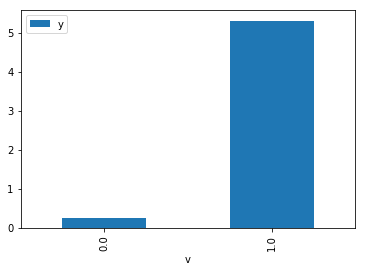

In [4]:
cdf = CausalDataFrame(df)
cdf.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              keep_original_treatment=True,
              proceed_when_unidentifiable=True).groupby('v').mean().plot(y='y', kind='bar')

In [5]:
cdf = CausalDataFrame(df)


In [6]:
cdf_1 = cdf.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = cdf.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'X0', 'U'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using McmcSampler for do sampling.


Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
['X0']
yes
{'observed': 'yes'}
Model to find the causal effect of treatment v on outcome y
{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler
treatments ['v']
backdoor ['X0']


INFO:pymc3:Auto-assigning NUTS sampler...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:NUTS: [y_sd, beta_y, v_sd, beta_v]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:04<00:00, 1610.17draws/s]


           X0    v         y
612  1.096689  1.0  5.683769
751  1.086641  0.0 -0.149304
108  2.198076  0.0  2.670802
123  1.005457  1.0  6.318228
451  0.619074  0.0 -0.676561
898  1.790624  0.0 -0.119601
577  2.902210  1.0  5.910286
911  0.744255  1.0  6.569214
796  0.314369  1.0  5.655302
923  1.498186  1.0  4.984086
           X0    v         y
223 -0.780635  1.0  4.130883
297  1.068778  1.0  3.776232
914  2.270624  1.0  6.126630
377 -0.016168  1.0  5.808494
475  0.632153  0.0  1.915281
982  1.122380  1.0  5.332776
11   0.484034  0.0 -0.492809
108  2.198076  0.0  2.670802
773  2.116355  0.0  0.378585
871  2.440941  0.0  2.240204
           X0  v         y
222 -0.152137  1  1.193461
431  2.214968  1  1.676506
700  0.694453  1  0.447275
718  1.999470  1  7.856392
670  1.135020  1  6.696070
166 -0.988365  1 -0.927939
909 -0.031697  1  5.897646
186  1.263339  1  0.121611
433  1.467491  1  1.818254
272  2.083983  1  5.634306


INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'X0', 'U'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


           X0  v         y
703  0.268584  1  3.415063
152 -0.112613  1  4.855769
675  0.874949  1  5.074571
962 -0.343846  1 -1.281090
812 -0.673580  1 -1.201265
795  1.292742  1  0.040008
706  2.753909  1  6.168354
215 -0.388153  1  0.017930
168  0.600874  1 -1.447453
635  3.066023  1  1.706179
           X0  v          y
429  0.913090  1   3.503883
765  0.814357  1   3.275973
316  2.200575  1   8.462898
13   1.211798  1   4.502192
55  -0.210134  1   4.072864
38  -0.589735  1  -1.252626
857 -0.063631  1  10.943018
421  1.555166  1   2.712822
945  0.740692  1   7.542532
890  0.289802  1   4.344509
{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler
           X0    v         y
251 -0.717858  1.0  3.136038
558  0.654406  0.0 -1.329377
98   1.252980  0.0  0.332077
630  0.377851  1.0  6.450061
119 -0.291942  0.0  0.417807
927  2.427735  1.0  6.882456
793 -0.659126  1.0  4.477884
502  0.96792

In [7]:
cdf_0

,X0,v,y
0,1.521782,0,0.734869
1,1.393287,0,3.111109
2,1.744401,0,2.814173
3,-0.984910,0,-0.547759
4,1.531897,0,0.250786
5,-0.414219,0,-0.263245
6,3.440954,0,3.228618
7,0.419157,0,0.527223
8,0.336473,0,-0.805009
9,-1.038132,0,0.206324


In [8]:
cdf_1 = cdf.causal.do(x={'v': 1}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True)
cdf_0 = cdf.causal.do(x={'v': 0}, 
              variable_types={'v': 'b', 'y': 'c', 'X0': 'c'}, 
              outcome='y',
              method='mcmc', 
              common_causes=['X0'],
              proceed_when_unidentifiable=True)

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'X0', 'U'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler
           X0    v         y
863  1.564016  1.0  5.108925
260 -0.321099  0.0 -0.677254
871  2.440941  0.0  2.240204
787  0.390931  1.0  5.349331
98   1.252980  0.0  0.332077
368  1.144241  0.0 -1.676433
765  0.814357  1.0  5.318945
667 -0.745254  0.0 -0.145617
838 -0.122247  0.0  0.330018
110  0.452500  1.0  2.972335
           X0    v         y
856  0.673717  1.0  3.456715
278  2.006345  1.0  7.413507
34   0.378670  0.0  1.629312
299 -0.612085  1.0  4.736626
293 -0.244447  0.0  0.007012
212 -0.944316  0.0 -0.126088
446 -0.200964  0.0  0.213676
590  0.789561  1.0  5.514221
289  0.858574  1.0  5.301086
518  0.563971  0.0  1.271799
           X0  v         y
996 -0.407929  1  0.144058
125  2.159065  1  5.595686
842  0.258104  1  4.303597
877  1.418883  1  0.774502
849 -0.133069  1 -0.850851
867  0.732025  1  4.252658
757 -1.953362  1 -0.46

INFO:dowhy.causal_identifier:Common causes of treatment and outcome:{'X0', 'U'}
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]


           X0  v         y
917  1.661385  1 -0.065593
205  0.521601  1  6.795833
507  0.781827  1  4.209187
794  0.117923  1 -1.575165
728  0.481260  1 -0.278846
574 -0.072040  1  0.104267
2    1.744401  1  6.409548
359  1.431587  1  6.761684
668  1.204832  1  0.660197
757 -1.953362  1 -0.464166
           X0  v         y
733  0.067462  1  5.597181
299 -0.612085  1  7.377299
501  0.152931  1  6.666780
479  2.444641  1  5.800005
416  1.549304  1  5.898808
150  1.289450  1  6.366260
54   2.066452  1  5.537184
928  2.967249  1  6.490645
842  0.258104  1  5.955817
113  1.097331  1  7.499741
{'observed': 'yes'}
{'label': 'Unobserved Confounders', 'observed': 'no'}
All common causes are observed. Causal effect can be identified.
McmcSampler
           X0    v         y
567 -0.652549  0.0  0.793207
171  0.841910  1.0  3.902883
614  0.087104  1.0  4.605662
536  0.162485  0.0  0.138752
581  1.895297  0.0  1.138745
365  1.252492  1.0  6.751402
741  1.207304  0.0  2.145552
813  1.276272  0.0 -0.9

In [9]:
(cdf_1['y'] - cdf_0['y']).mean()

In [10]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(cdf))

In [11]:
model = OLS(df['y'], df[['X0', 'v']])
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     7979.
Date:                Sun, 10 Feb 2019   Prob (F-statistic):               0.00
Time:                        14:51:27   Log-Likelihood:                -1431.1
No. Observations:                1000   AIC:                             2866.
Df Residuals:                     998   BIC:                             2876.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             0.4582      0.029     15.991      0.000       0.402       0.514
v              4.9844      0.052     96.455      0.000       4.883       5.086
==============================================================================
Omnibus:                        8.676   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.070
Skew:                          -0.032   Prob(JB):                       0.0481
Kurtosis:                       2.624   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
cdf_1

,X0,v,y
0,1.521782,1,5.219948
1,1.393287,1,6.244632
2,1.744401,1,7.404562
3,-0.984910,1,5.158497
4,1.531897,1,4.609039
5,-0.414219,1,4.628114
6,3.440954,1,5.222432
7,0.419157,1,7.573535
8,0.336473,1,6.183994
9,-1.038132,1,3.692398


In [13]:
cdf

,X0,v,y
0,1.521782,0.0,-0.096805
1,1.393287,1.0,7.398900
2,1.744401,1.0,6.409548
3,-0.984910,0.0,0.488064
4,1.531897,0.0,-0.790932
5,-0.414219,0.0,0.813474
6,3.440954,1.0,7.405016
7,0.419157,1.0,4.270433
8,0.336473,1.0,4.983390
9,-1.038132,1.0,2.763467
